In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from mlxtend.plotting import plot_decision_regions
import scipy.stats as stats
from sklearn import datasets


In [3]:
%matplotlib inline
sns.set_style("white")

In [4]:
iris =datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target

In [5]:
iris_df = pd.DataFrame(X)
iris_df.columns =['petal_length','petal_width']

In [6]:
iris_df['target']=y

In [7]:
iris_df.head()

,petal_length,petal_width,target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


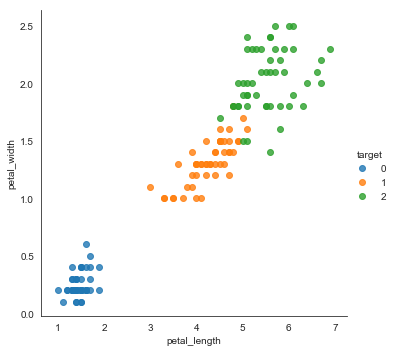

In [9]:
sns.lmplot(x='petal_length',y='petal_width',data=iris_df,hue='target',fit_reg=False)

In [11]:
X= iris_df[['petal_length','petal_width']]
y= iris_df['target']

In [12]:
X_train,X_test,y_train,y_test =\
train_test_split(X,y,test_size=0.2,stratify=y)

In [13]:
lables=[1,1,1,1,0,0]

In [15]:
stats.mode(lables)[0][0]

1

In [18]:
def euclidean_distance(instance1,instance2):
    distance =np.sqrt(np.sum(np.square((instance1-instance2))))

    return distance

In [19]:
def knn(X_train,test_instance,y_train,k):
    distance_lable_list=[]
    for i in range(len(X_train)):
        distance=euclidean_distance(test_instance,X_train.iloc[i])
        y_target = y_train.iloc[i]
        distance_lable_list.append([distance,y_target])
    distance_lable_list.sort(key=lambda x :x[0])
    top_k_elements=distance_lable_list[0:k]
    distances,lables=zip(*top_k_elements)
    prediction = stats.mode(lables)[0][0]
    return prediction
    

In [62]:
predictions= []
for i in range(len(X_test)):
    prediction=knn(X_train,X_test.iloc[i],y_train,5)
    predictions.append(prediction)

In [63]:
predictions_df= pd.DataFrame (np.c_[X_test,predictions,y_test],
                             columns=['petal_length','petal_width','predictions','actual'])

In [64]:
predictions_df[predictions_df['predictions']!=predictions_df['actual']]

,petal_length,petal_width,predictions,actual
22,5.1,1.5,1.0,2.0
27,5.0,1.5,1.0,2.0


In [65]:
accuracy_score(predictions_df['predictions'],predictions_df['actual'])

0.9333333333333333

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn=KNeighborsClassifier(metric='euclidean',n_neighbors=9)
model =knn.fit(X_train,y_train)
y_pred =model.predict(X_test)

In [101]:
accuracy_score(y_pred,y_test)

0.9333333333333333

In [102]:
confusion_matrix(y_pred,y_test)

array([[10,  0,  0],
       [ 0, 10,  2],
       [ 0,  0,  8]], dtype=int64)

In [103]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.83      0.91        12
           2       0.80      1.00      0.89         8

   micro avg       0.93      0.93      0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



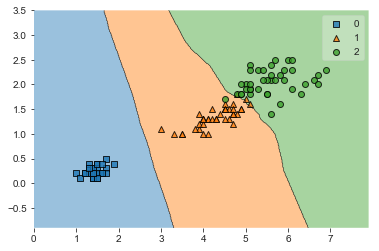

In [104]:
X_train_array = X_train.values
y_train_array = y_train.values
plot_decision_regions(X_train_array,y_train_array,model)